# 確率分布の作図

- 執筆期間：2022/01/17 - 2022/01/1

In [1]:
# 更新日時を出力
import datetime
now = datetime.datetime.now()
print('更新日時：' + '{0:%Y-%m-%d %H:%M}'.format(now))

更新日時：2022-01-19 06:20


<br>

# 多項分布

　多項分布(Multinomial Distribution)の計算と作図を行います。  
<br>

　利用するライブラリを読み込みます。

In [2]:
# 利用するライブラリ
import numpy as np
from scipy.stats import multinomial # 多項分布
from scipy.special import gamma, loggamma # ガンマ関数, 対数ガンマ関数
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

　分布の変化をアニメーション(gif画像)で確認するのに`matplotlib`ライブラリの`animation`モジュールを利用します。不要であれば省略してください。  
<br>

## 定義式の確認

　まずは、多項分布の定義式を確認します。  
<br>

　多項分布は、次の式で定義されます。詳しくは「多項分布の定義式」を参照してください。

$$
\mathrm{Mult}(\boldsymbol{x} | M, \boldsymbol{\phi})
  = \frac{
        M!
    }{
        x_1! x_2! \cdots x_V!
    }
    \prod_{v=1}^V
        \phi_v^{x_v}
$$

　ここで、$x_v$はクラス$v$が出現した回数、$M$は試行回数、$\phi_v$はクラス$v$の出現確率です。  
　確率変数の値$\mathbf{x} = (x_1, \cdots, x_V)$は、$x_v \in \{1, \cdots, V\}$、$\sum_{v=1}^V x_v = M$となります。パラメータ$\boldsymbol{\phi} = (\phi_1, \cdots, \phi_V)$は、$\phi_v \in (0, 1)$、$\sum_{v=1}^V \phi_v = 1$を満たす必要があります。  

　この式の対数をとると、次の式になります。

$$
\log \mathrm{Mult}(\boldsymbol{x} | N, \boldsymbol{\phi})
  = \log M!
    + \sum_{v=1}^V \Bigl\{
        x_v \log \phi_v
        - \log x_v!
      \Bigr\}
$$

　多項分布のクラス$v$における平均と分散は、次の式で計算できます。詳しくは「統計量の導出」を参照してください。

$$
\begin{aligned}
\mathbb{E}[x_v]
   &= N \phi_v
\\
\mathbb{V}[x_v]
   &= N \phi_v
      (1 - \phi_v)
\end{aligned}
$$

<br>

　これらの計算を行いグラフを作成します。  
<br>

## 確率の計算

　多項分布に従う確率を計算する方法をいくつか確認します。  
<br>

　パラメータを設定します。

In [3]:
# パラメータを指定
phi_v = np.array([0.3, 0.5, 0.2])

# 確率変数の値を指定
x_v = np.array([2.0, 3.0, 1.0])

# データ数を計算
M = np.sum(x_v)

　多項分布のパラメータ$\boldsymbol{\phi} = (\phi_1, \cdots, \phi_V)$、$0 \leq \phi_v \leq 1$、$\sum_{v=1}^V \phi_v = 1$、試行回数$M$、確率変数がとり得る値$\mathbf{x} = (x_1, \cdots, x_V)$、$x_v \in \{0, 1, \cdots, M\}$、$\sum_{v=1}^V x_v = M$を指定します。設定した値に従う確率を計算します。  

　まずは、定義式から確率を計算します。

In [4]:
# 定義式により確率を計算
C = gamma(M + 1.0) / np.prod(gamma(x_v + 1.0))
prob = C * np.prod(phi_v**x_v)
print(prob)

0.13499999999999998


　多項分布の定義式

$$
\begin{aligned}
C_{\mathrm{Mult}}
   &= \frac{M!}{\prod_{v=1}^V x_v!}
\\
\mathrm{Mult}(\mathbf{x} | M, \boldsymbol{\phi})
   &= C_{\mathrm{Mult}}
      \prod_{v=1}^V
          \phi_v^{x_v}
\end{aligned}
$$

で計算します。$C_{\mathrm{Mult}}$は、多項分布の正規化係数です。  
　階乗$x!$の計算は、ガンマ関数$\Gamma(x + 1) = x!$に置き換えて計算します。ガンマ関数は、`SciPy`ライブラリの`special`モジュールの`gamma()`で計算できます。  

　対数をとった定義式から計算します。

In [5]:
# 対数をとった定義式により確率を計算
log_C = loggamma(M + 1.0) - np.sum(loggamma(x_v + 1.0))
log_prob = log_C + np.sum(x_v * np.log(phi_v))
prob = np.exp(log_prob)
print(prob, log_prob)

0.13500000000000006 -2.002480500543707


　対数をとった定義式

$$
\begin{aligned}
\log C_{\mathrm{Mult}}
   &= \log M!
      - \sum_{v=1}^V
          \log x_v!
\\
\log \mathrm{Mult}(\mathbf{x} | M, \boldsymbol{\phi})
   &= \log C_{\mathrm{Mult}}
      + \sum_{v=1}^V
          x_v \log \phi_v
\end{aligned}
$$

を計算します。  
　対数をとったガンマ関数は`loggamma()`で計算できます。  
　計算結果の指数をとると確率が得られます。

$$
\mathrm{Mult}(\mathbf{x} | M, \boldsymbol{\phi})
    = \exp \Bigr(
          \log \mathrm{Mult}(\mathbf{x} | M, \boldsymbol{\phi})
      \Bigr)
$$

　指数と対数の性質より$\exp(\log x) = x$です。  

　次は、`SciPy`ライブラリのモジュールを使って確率を計算します。  
　多項分布のモジュール`multinomial`の確率計算メソッド`pmf()`を使って計算します。

In [6]:
# 多項分布の関数により確率を計算
prob = multinomial.pmf(x=x_v, n=M, p=phi_v)
print(prob)

0.13500000000000018


　出現頻度の引数`x`に`x_v`、試行回数の引数を`n = M`、出現確率の引数`p`に`phi_v`を指定します。  

　`logpmf()`だと対数をとった確率を計算します。

In [7]:
# 多項分布の対数をとった関数により確率を計算
log_prob = multinomial.logpmf(x=x_v, n=M, p=phi_v)
prob = np.exp(log_prob)
print(prob, log_prob)

0.13500000000000018 -2.0024805005437063


　計算結果の指数をとると確率が得られます。  
<br>

## 統計量の計算

　多項分布の平均と分散を計算します。  
<br>

　クラス$v$の平均を計算します。

In [8]:
# クラス番号を指定
v = 1

# クラスvの平均を計算
E_x = M * phi_v[v]
print(E_x)

3.0


　多項分布の各クラスの平均は、次の式で計算できます。

$$
\mathbb{E}[x_v]
    = N \phi_v
$$

　クラス$v$の分散を計算します。

In [9]:
# クラスvの分散を計算
V_x = M * phi_v[v] * (1.0 - phi_v[v])
print(V_x)

1.5


　多項分布の各クラスの分散は、次の式で計算できます。

$$
\mathbb{V}[x_v]
    = N \phi_v
      (1 - \phi_v)
$$

<br>

## グラフの作成

　`Matplotlib`ライブラリの`PyPlot`モジュールを利用して多項分布のグラフを作成します。  
<br>

### ・分布の計算

　作図に利用する$\mathbf{x} = (x_1, x_2, x_3)$の値を作成します。ここでは、3次元のグラフで描画するため$V = 3$とします。

In [10]:
# 試行回数を指定
M = 10

# 作図用のxの値を作成
x_vals = np.arange(M + 1)

# 格子点を作成
X1, X2 = np.meshgrid(x_vals, x_vals)

# 作図用のxの点を作成
x1_vals = X1.flatten()
x2_vals = X2.flatten()
x3_vals = np.where(x1_vals+x2_vals <= M, M - (x1_vals+x2_vals), 0.0)

# 計算用のxの点を作成
x_points = np.stack([x1_vals, x2_vals, x3_vals], axis=1)
print(x_points[:5])
print(x_points.shape)

[[ 0.  0. 10.]
 [ 1.  0.  9.]
 [ 2.  0.  8.]
 [ 3.  0.  7.]
 [ 4.  0.  6.]]
(121, 3)


　$\mathbf{x}$の各要素$x_v$がとり得る値(`0`から`M`の整数)を`x_vals`とします。  
　`x_vals`の全ての組み合わせを持つように$x_1, x_2$を作成します。`np.meshgrid()`で全ての組み合わせを作成します。結果は2次元配列になるので、`flatten()`で1次元配列に並び替えます。  
　`np.where()`を使って$x_3$を作成します。$x_1 + x_2 + x_3 = M$となるように$x_3$の値を決めます。ただし、$x_1 + x_2 > M$となる場合は、$x_3 = 0$とします。  

　$x_1, x_2, x_3$の値`x1_vals, x2_vals, x3_vals`を列とする配列を作成します。`x_points`の各行が1つの点$\mathbf{x}$に対応します。  

　作成した$\mathbf{x}$ごとの確率を計算します。

In [11]:
# 分布を計算
probability = multinomial.pmf(x=x_points, n=M, p=phi_v)
print(probability[:5])
print(np.sum(probability))

[1.02400e-07 1.53600e-06 1.03680e-05 4.14720e-05 1.08864e-04]
1.0000000000000004


　`x_points`の行ごとの確率を返します。  
　分布の総和は1になります。    

　作図用の点と対応する確率が得られたので、分布を描画していきます。  
<br>

### ・行ごとに色付け

　y軸($x_2$)の値ごとに色を変えて描画します。

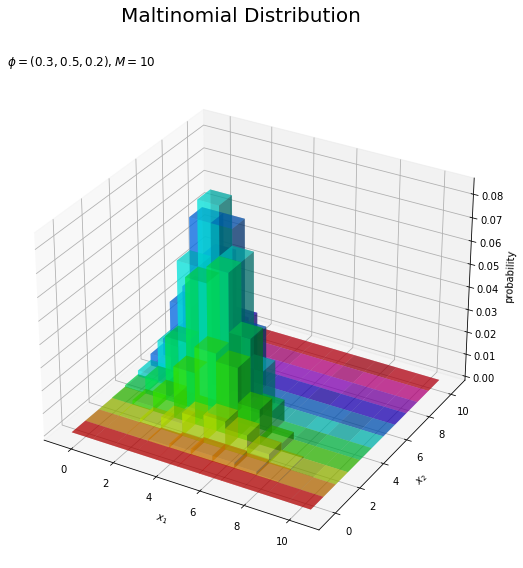

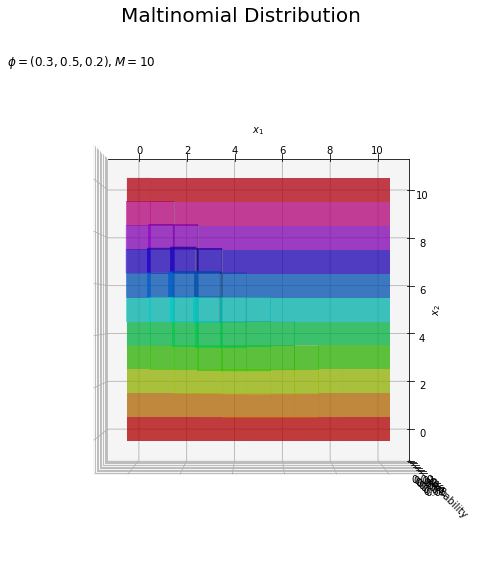

In [12]:
# カラーマップを設定
cm = plt.get_cmap('hsv')

# 多項分布を作図
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_vals - 0.5, y=x2_vals - 0.5, z=np.zeros_like(x1_vals), 
         dx=1.0, dy=1.0, dz=probability, 
         color=cm(x2_vals / M), alpha=0.5, shade=True) # 3D棒グラフ
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + '), M=' + str(M) + '$', loc='left')
#ax.view_init(elev=90, azim=270) # 表示アングル
plt.show()

### 資料作成用:(再掲)

# 多項分布を作図
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_vals - 0.5, y=x2_vals - 0.5, z=np.zeros_like(x1_vals), 
         dx=1.0, dy=1.0, dz=probability, 
         color=cm(x2_vals / M), alpha=0.5, shade=True) # 3D棒グラフ
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + '), M=' + str(M) + '$', loc='left')
ax.view_init(elev=90, azim=270) # 表示アングル
plt.show()

　$x_2$の値`x2_vals`を最大値の`M`で割って正規化した値を、色(RGB)情報に変換して`color`引数に指定します。  

　$x_2 = 5$における$M + 1$個の点($x_1 = 0, \cdots, M$)を確認してみます。

In [13]:
# 確認
print(x_points[55:66])
print(probability[55:66])

[[ 0.  5.  5.]
 [ 1.  5.  4.]
 [ 2.  5.  3.]
 [ 3.  5.  2.]
 [ 4.  5.  1.]
 [ 5.  5.  0.]
 [ 6.  5.  0.]
 [ 7.  5.  0.]
 [ 8.  5.  0.]
 [ 9.  5.  0.]
 [10.  5.  0.]]
[0.00252    0.0189     0.0567     0.08505    0.0637875  0.01913625
 0.         0.         0.         0.         0.        ]


　$\mathbf{x} = (x_1, x_2, x_3)$について、$(6, 5, 0)$から$(10, 5, 0)$は、$\mathbf{x}$がとり得ない値なので確率が0になっています。  

　そこで、$\mathbf{x}$がとり得ない点をマスクします。

In [14]:
# xがとり得ない値の要素をマスク
x2_mask_vals = np.ma.masked_where(condition=x1_vals+x2_vals > M, a=x2_vals)
probability_mask = np.ma.masked_where(condition=x1_vals+x2_vals > M, a=probability)
print(x1_vals[55:66])
print(x2_mask_vals[55:66])
print(probability_mask[55:66])

[ 0  1  2  3  4  5  6  7  8  9 10]
[5 5 5 5 5 5 -- -- -- -- --]
[0.002520000000000002 0.018899999999999986 0.05670000000000003
 0.08504999999999999 0.06378750000000005 0.019136250000000018 -- -- -- --
 --]


　`np.ma.masked_where()`で$x_1 + x_2 > M$の要素をマスクします。第1引数に条件式(の結果)を、第2引数に対象の配列を指定します。`True`の要素をマスクして返します。  
　マスクされた要素は`--`と表示されます。  

　先ほどと同様に作図します。

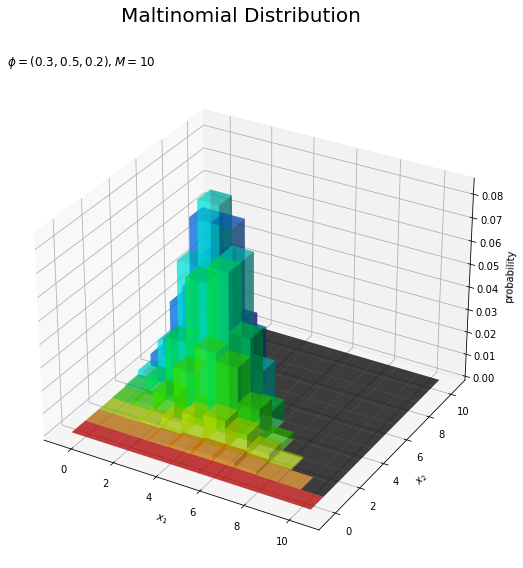

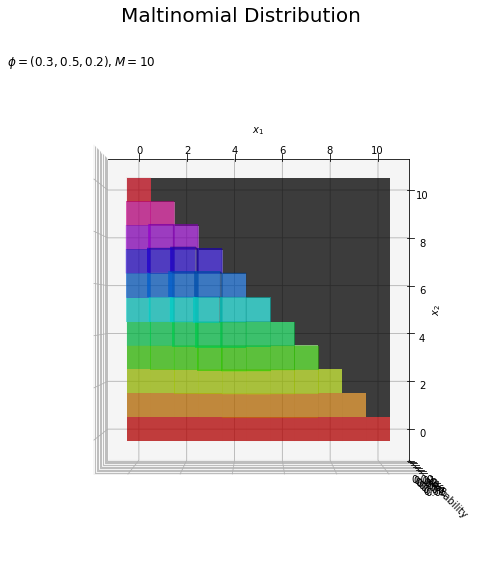

In [15]:
# カラーマップを設定
cm = plt.get_cmap('hsv')

# 多項分布を作図
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_vals - 0.5, y=x2_vals - 0.5, z=np.zeros_like(x1_vals), 
         dx=1.0, dy=1.0, dz=probability_mask, 
         color=cm(x2_mask_vals / M), alpha=0.5, shade=True) # 3D棒グラフ
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + '), M=' + str(M) + '$', loc='left')
#ax.view_init(elev=90, azim=270) # 表示アングル
plt.show()

### 資料作成用:(再掲)

# 多項分布を作図
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_vals - 0.5, y=x2_vals - 0.5, z=np.zeros_like(x1_vals), 
         dx=1.0, dy=1.0, dz=probability_mask, 
         color=cm(x2_mask_vals / M), alpha=0.5, shade=True) # 3D棒グラフ
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + '), M=' + str(M) + '$', loc='left')
ax.view_init(elev=90, azim=270) # 表示アングル
plt.show()

　マスクされた点が黒色になっています。  

　次は、マスクではなく消去します。

In [16]:
# xがとり得ない値の要素を削除
x1_del_vals = np.delete(arr=x1_vals, obj=x1_vals+x2_vals > M)
x2_del_vals = np.delete(arr=x2_vals, obj=x1_vals+x2_vals > M)
probability_del = np.delete(arr=probability, obj=x1_vals+x2_vals > M)
print(x1_del_vals[45:55])
print(x2_del_vals[45:55])
print(probability_del[45:55])

[0 1 2 3 4 5 0 1 2 3]
[5 5 5 5 5 5 6 6 6 6]
[0.00252    0.0189     0.0567     0.08505    0.0637875  0.01913625
 0.00525    0.0315     0.070875   0.070875  ]


　`np.delete()`の第1引数に対象の配列を、第2引数に条件式(の結果)を指定すると、`True`の要素を削除して返します。  

　これまでと同様に作図します。

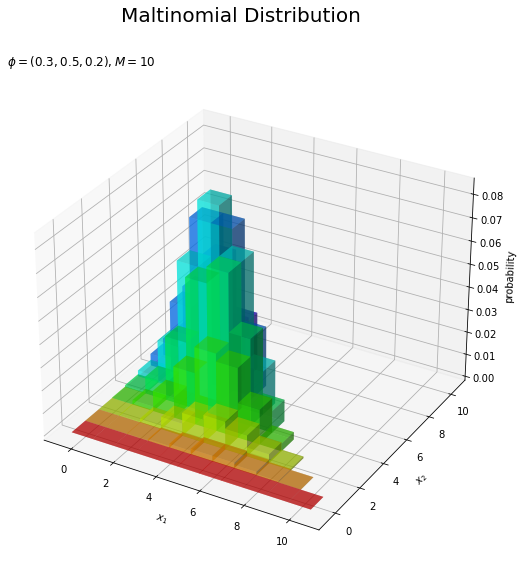

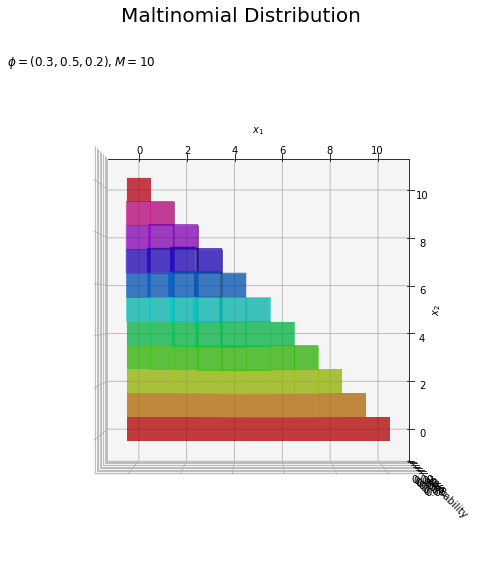

In [17]:
# カラーマップを設定
cm = plt.get_cmap('hsv')

# 多項分布を作図
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_del_vals - 0.5, y=x2_del_vals - 0.5, z=np.zeros_like(x1_del_vals), 
         dx=1.0, dy=1.0, dz=probability_del, 
         color=cm(x2_del_vals / M), alpha=0.5, shade=True) # 3D棒グラフ
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + '), M=' + str(M) + '$', loc='left')
#ax.view_init(elev=90, azim=270) # 表示アングル
plt.show()

### 資料作成用:(再掲)

# 多項分布を作図
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_del_vals - 0.5, y=x2_del_vals - 0.5, z=np.zeros_like(x1_del_vals), 
         dx=1.0, dy=1.0, dz=probability_del, 
         color=cm(x2_del_vals / M), alpha=0.5, shade=True) # 3D棒グラフ
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + '), M=' + str(M) + '$', loc='left')
ax.view_init(elev=90, azim=270) # 表示アングル
plt.show()

　$x_1 + x_2 > M$の範囲が描画されなくなりました。  
<br>

### ・確率に応じて色付け

　先ほどは、点の位置によって色分けしました。今度は、各点の確率の大小によって色を変えて描画します。

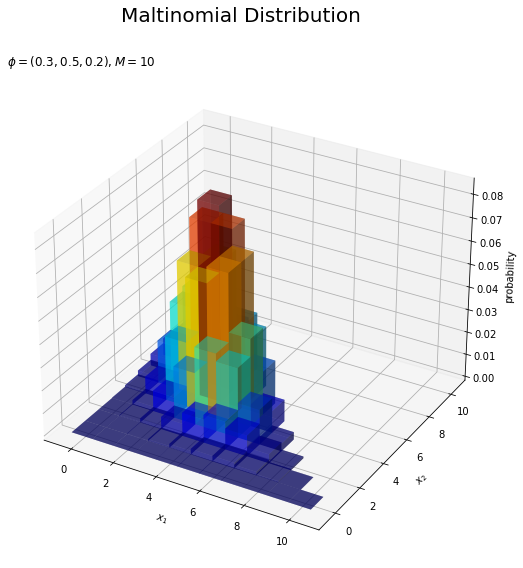

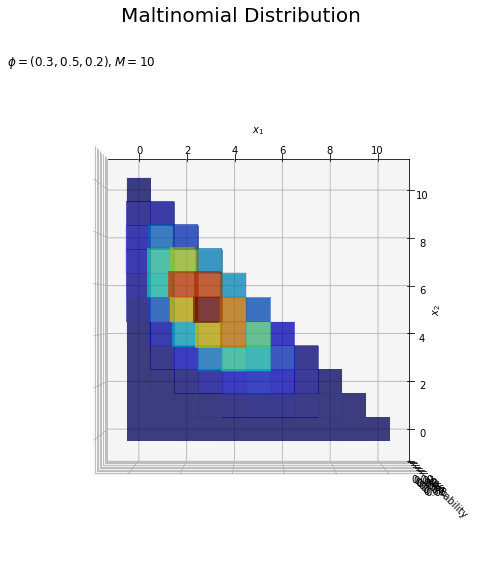

In [18]:
# カラーマップを設定
cm = plt.get_cmap('jet')

# 多項分布を作図
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_del_vals - 0.5, y=x2_del_vals - 0.5, z=np.zeros_like(x1_del_vals), 
         dx=1.0, dy=1.0, dz=probability_del, 
         color=cm(probability_del / np.max(probability_del)), alpha=0.5, shade=True) # 3D棒グラフ
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + '), M=' + str(M) + '$', loc='left')
#ax.view_init(elev=0, azim=300) # 表示アングル:(横から)
#ax.view_init(elev=90, azim=270) # 表示アングル:(上から)
plt.show()

### 資料作成用:(再掲)

# 多項分布を作図
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_del_vals - 0.5, y=x2_del_vals - 0.5, z=np.zeros_like(x1_del_vals), 
         dx=1.0, dy=1.0, dz=probability_del, 
         color=cm(probability_del / np.max(probability_del)), alpha=0.5, shade=True) # 3D棒グラフ
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + '), M=' + str(M) + '$', loc='left')
#ax.view_init(elev=0, azim=300) # 表示アングル:(横から)
ax.view_init(elev=90, azim=270) # 表示アングル:(上から)
plt.show()

　各点の確率`probability`を最大値で割って正規化した値を、色(RGB)情報に変換して`color`引数に指定します。   

　続いて、統計量の情報を重ねて描画します。

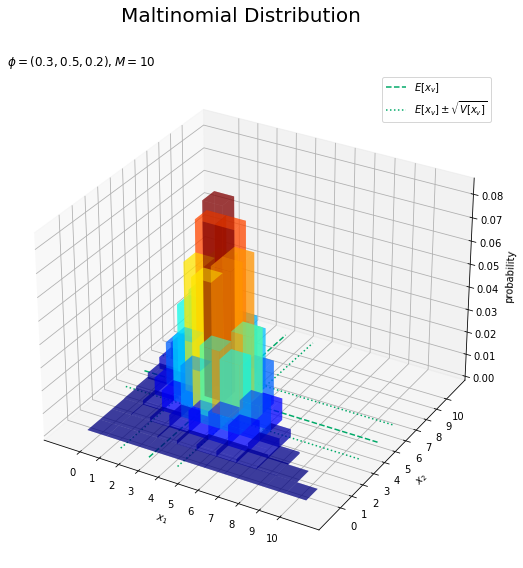

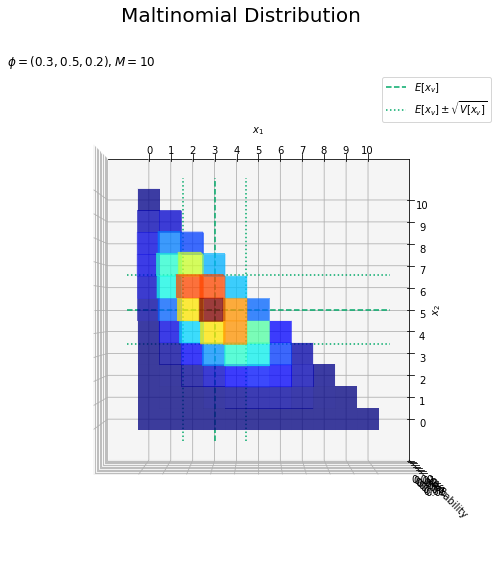

In [19]:
# 補助線用の値を作成
vals = np.arange(-1, M + 2)
zeros = np.repeat(0.0, len(vals))

# 補助線用の統計量を計算
E_x1 = M * phi_v[0]
V_x1 = M * phi_v[0] * (1.0 - phi_v[0])
s_x1 = np.sqrt(V_x1)
E_x2 = M * phi_v[1]
V_x2 = M * phi_v[1] * (1.0 - phi_v[1])
s_x2 = np.sqrt(V_x2)

# カラーマップを設定
cm = plt.get_cmap('jet')

# 多項分布を作図
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_del_vals - 0.5, y=x2_del_vals - 0.5, z=np.zeros_like(x1_del_vals), 
         dx=1.0, dy=1.0, dz=probability_del, 
         color=cm(probability_del / np.max(probability_del)), alpha=0.5, shade=False) # 分布
ax.plot(xs=np.repeat(E_x1, len(vals)), ys=vals, zs=zeros, color='#00A968', linestyle='--', label='$E[x_v]$') # クラス1の平均
ax.plot(xs=np.repeat(E_x1 - s_x1, len(vals)), ys=vals, zs=zeros, color='#00A968', linestyle=':', label='$E[x_v] \pm \sqrt{V[x_v]}$') # クラス1の平均 + 標準偏差
ax.plot(xs=np.repeat(E_x1 + s_x1, len(vals)), ys=vals, zs=zeros, color='#00A968', linestyle=':') # クラス1の平均 + 標準偏差
ax.plot(xs=vals, ys=np.repeat(E_x2, len(vals)), zs=zeros, color='#00A968', linestyle='--') # クラス2の平均
ax.plot(xs=vals, ys=np.repeat(E_x2 - s_x2, len(vals)), zs=zeros, color='#00A968', linestyle=':') # クラス2の平均 + 標準偏差
ax.plot(xs=vals, ys=np.repeat(E_x2 + s_x2, len(vals)), zs=zeros, color='#00A968', linestyle=':') # クラス2の平均 + 標準偏差
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + '), M=' + str(M) + '$', loc='left')
ax.set_xticks(ticks=x_vals) # x軸目盛
ax.set_yticks(ticks=x_vals) # y軸目盛
ax.legend() # 凡例
#ax.view_init(elev=90, azim=270) # 表示アングル
plt.show()

### 資料作成用:(再掲)

# 多項分布を作図
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_del_vals - 0.5, y=x2_del_vals - 0.5, z=np.zeros_like(x1_del_vals), 
         dx=1.0, dy=1.0, dz=probability_del, 
         color=cm(probability_del / np.max(probability_del)), alpha=0.5, shade=False) # 分布
ax.plot(xs=np.repeat(E_x1, len(vals)), ys=vals, zs=zeros, color='#00A968', linestyle='--', label='$E[x_v]$') # クラス1の平均
ax.plot(xs=np.repeat(E_x1 - s_x1, len(vals)), ys=vals, zs=zeros, color='#00A968', linestyle=':', label='$E[x_v] \pm \sqrt{V[x_v]}$') # クラス1の平均 + 標準偏差
ax.plot(xs=np.repeat(E_x1 + s_x1, len(vals)), ys=vals, zs=zeros, color='#00A968', linestyle=':') # クラス1の平均 + 標準偏差
ax.plot(xs=vals, ys=np.repeat(E_x2, len(vals)), zs=zeros, color='#00A968', linestyle='--') # クラス2の平均
ax.plot(xs=vals, ys=np.repeat(E_x2 - s_x2, len(vals)), zs=zeros, color='#00A968', linestyle=':') # クラス2の平均 + 標準偏差
ax.plot(xs=vals, ys=np.repeat(E_x2 + s_x2, len(vals)), zs=zeros, color='#00A968', linestyle=':') # クラス2の平均 + 標準偏差
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + '), M=' + str(M) + '$', loc='left')
ax.set_xticks(ticks=x_vals) # x軸目盛
ax.set_yticks(ticks=x_vals) # y軸目盛
ax.legend() # 凡例
ax.view_init(elev=90, azim=270) # 表示アングル
plt.show()

　各クラス(軸)$x_1, x_2$の平均(破線)が交差する点が確率の最大値であるのが分かります。  
　また、平均を中心に標準偏差の範囲(破線)で山が高く(赤に近い色に)なっているのが分かります。  
<br>

## パラメータと分布の形状の関係

　パラメータ$\boldsymbol{\phi}$と試行回数$M$が及ぼす分布への影響をアニメーション(gif画像)で可視化します。  
<br>

### ・パラメータの影響

　まずは、パラメータ$\boldsymbol{\phi}$の値を少しずつ変更して、分布の変化をアニメーションで確認します。  
<br>

　作図に利用する$\boldsymbol{\phi} = (\phi_1, \phi_2, \phi_3)$の値を作成します。

In [20]:
# 作図用のphiの値を作成
phi_vals = np.arange(start=0.0, stop=1.01, step=0.01)

# 作図用のphiの点を作成
phi_points = np.stack([
    phi_vals, 
    (1.0 - phi_vals) * 0.6, # 配分を指定
    (1.0 - phi_vals) * 0.4 # 配分を指定
], axis=1)
print(phi_points[:5])
print(np.sum(phi_points[:5], axis=1))
print(phi_points.shape)

[[0.    0.6   0.4  ]
 [0.01  0.594 0.396]
 [0.02  0.588 0.392]
 [0.03  0.582 0.388]
 [0.04  0.576 0.384]]
[1. 1. 1. 1. 1.]
(101, 3)


　$\phi_1$がとり得る値を作成して`phi_vals`とします。  
　$\phi_1 + \phi_2 + \phi_3 = 1$なので、$1 - \phi_1$は$\phi_1$以外の確率の和$\phi_2 + \phi_3$です。よって、`1 - phi_vals`を分割して$\phi_2, \phi_3$の値とします。  
　$\phi_1, \phi_2, \phi_3$の値を列とする配列を作成します。  

　「グラフの作成」と同様に$\mathbf{x} = (x_1, x_2, x_3)$の値を作成します。

In [21]:
# 試行回数を指定
M = 10

# 作図用のxの値を作成
x_vals = np.arange(M + 1)

# 格子点を作成
X1, X2 = np.meshgrid(x_vals, x_vals)

# 作図用のxの点を作成:(xがとり得ない値を消去する場合)
x1_vals = np.delete(X1.flatten(), obj=(X1 + X2).flatten() > M)
x2_vals = np.delete(X2.flatten(), obj=(X1 + X2).flatten() > M)

# 作図用のxの点を作成:(全ての組み合わせを描画する場合)
#x1_vals = X1.flatten()
#x2_vals = X2.flatten()
x3_vals = np.where(x1_vals+x2_vals <= M, M - (x1_vals+x2_vals), 0.0)

# 計算用のxの点を作成
x_points = np.stack([x1_vals, x2_vals, x3_vals], axis=1)
print(x_points[:5])
print(x_points.shape)

[[ 0.  0. 10.]
 [ 1.  0.  9.]
 [ 2.  0.  8.]
 [ 3.  0.  7.]
 [ 4.  0.  6.]]
(66, 3)


<br>

　gif画像を作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


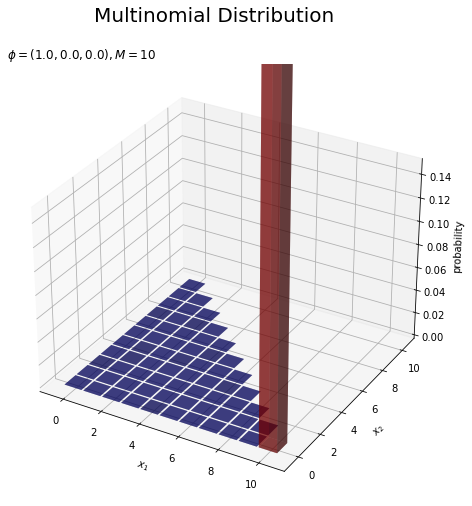

In [22]:
# カラーマップの設定
cm = plt.get_cmap('jet')

# カラーマップの最大値を指定
p_max = 0.15

# 図を初期化
fig = plt.figure(figsize=(12, 8)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle('Multinomial Distribution', fontsize=20)

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のパラメータを取得
    phi_v = phi_points[i]
    
    # i番目のパラメータによる分布を計算
    probability = multinomial.pmf(x=x_points, n=M, p=phi_v)
    
    # xがとり得ない値の要素をマスク:(xがとり得ない値をマスクする場合)
    #probability = np.ma.masked_where(x1_vals + x2_vals > M, probability)
    
    # 多項分布を作図
    ax.bar3d(x=x1_vals - 0.45, y=x2_vals - 0.45, z=np.zeros_like(x1_vals), 
             dx=0.9, dy=0.9, dz=probability, 
             color=cm(probability / p_max), alpha=0.5, shade=True) # 3D棒グラフ
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('probability')
    ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in np.round(phi_v, 2)]) + ')' +
                 ', M=' + str(M) + '$', loc='left')
    ax.set_zlim(0.0, p_max) # z軸の表示範囲
    #ax.view_init(elev=0, azim=315) # 表示アングル

# gif画像を作成
anime_prob = FuncAnimation(fig, update, frames=len(phi_vals), interval=50)

# gif画像を保存
anime_prob.save('../figure/Python/Multinomial_prob_phi.gif')

　$\phi_2$の値が大きいほど$x_2$が大きい確率が高く、$\phi_1$が大きくなるほど$x_1$が大きい確率が高くなるのを確認できます。  
<br>

### ・試行回数の影響

　続いて、$\boldsymbol{\phi}$を固定して$M$を変更したときの、分布の変化をアニメーションで確認します。  

MovieWriter ffmpeg unavailable; using Pillow instead.


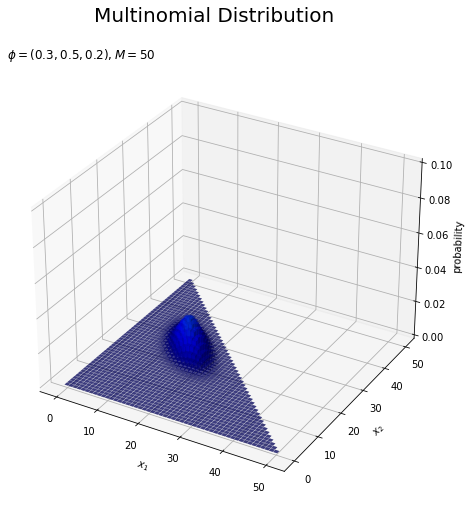

In [23]:
# パラメータを指定
phi_v = np.array([0.3, 0.5, 0.2])

# 試行回数の最大値を指定
M_max = 50

# カラーマップの設定
cm = plt.get_cmap('jet')

# カラーマップの最大値を指定
p_max = 0.1

# 図を初期化
fig = plt.figure(figsize=(12, 8)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle('Multinomial Distribution', fontsize=20)

# 作図処理を関数として定義
def update(M):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # 1からMに変換
    M += 1
    
    # 作図用のxの値を作成
    x_vals = np.arange(M + 1)
    
    # 格子状のxの点を作成
    X1, X2 = np.meshgrid(x_vals, x_vals)
    
    # 作図用のxの点を作成:(xがとり得ない値を消去する場合)
    x1_vals = np.delete(X1.flatten(), obj=(X1 + X2).flatten() > M)
    x2_vals = np.delete(X2.flatten(), obj=(X1 + X2).flatten() > M)
    
    # 作図用のxの点を作成:(全ての組み合わせを描画する場合)
    #x1_vals = X1.flatten()
    #x2_vals = X2.flatten()
    x3_vals = np.where(x1_vals+x2_vals <= M, M - (x1_vals+x2_vals), 0.0)
    
    # 計算用のxの点を作成
    x_points = np.stack([x1_vals, x2_vals, x3_vals], axis=1)
    
    # 分布を計算
    probability = multinomial.pmf(x=x_points, n=M, p=phi_v)
    
    # xがとり得ない値の要素をマスク:(xがとり得ない値をマスクする場合)
    #probability = np.ma.masked_where(x1_vals + x2_vals > M, probability)
    
    # 多項分布を作図
    ax.bar3d(x=x1_vals - 0.45, y=x2_vals - 0.45, z=np.zeros_like(x1_vals), 
             dx=0.9, dy=0.9, dz=probability, 
             color=cm(probability / p_max), alpha=0.5, shade=True) # 3D棒グラフ
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('probability')
    ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + ')' +
                 ', M=' + str(M) + '$', loc='left')
    ax.set_zlim(0.0, p_max) # z軸の表示範囲
    #ax.view_init(elev=0, azim=315) # 表示アングル

# gif画像を作成
anime_prob = FuncAnimation(fig, update, frames=M_max, interval=100)

# gif画像を保存
anime_prob.save('../figure/Python/Multinomial_prob_M.gif')

　試行回数$M$が増えるに従って、$x_1, x_2$が大きいほど確率が高くなる(山が右上に移動する)のを確認できます。ただし、$\mathbf{x}$がとり得る値の範囲も広がっていくため、全体における相対的な山の位置は変わりません。また分布の総和は1なので、$\mathbf{x}$がとり得る値が増えるほど1つの点の確率(z軸の値)が小さくなります。  
<br>

## 乱数の生成

　多項分布の乱数を生成してヒストグラムを確認します。  
<br>

　パラメータを指定して、多項分布に従う乱数を生成します。

In [24]:
# パラメータを指定
phi_v = np.array([0.3, 0.5, 0.2])

# 試行回数を指定
M = 10

# データ数を指定
N = 1000

# 多項分布に従う乱数を生成
x_nv = np.random.multinomial(n=M, pvals=phi_v, size=N)
print(x_nv[:5])
print(x_nv.shape)

[[2 5 3]
 [3 5 2]
 [3 4 3]
 [1 5 4]
 [2 6 2]]
(1000, 3)


　多項分布の乱数生成関数`np.random.multinomial()`の試行回数の引数`n `に`M`、出現確率(パラメータ)の引数`pvals`に`phi`、データ数(サンプルサイズ)の引数`size`に`N`を指定します。  

　$\mathbf{x}$がとり得る値を作成します。

In [25]:
# 作図用のxの値を作成
x_vals = np.arange(M + 1)

# 格子点を作成
X1, X2 = np.meshgrid(x_vals, x_vals)

# 作図用のxの点を作成:(xがとり得ない値を消去する場合)
x1_vals = np.delete(X1.flatten(), obj=(X1 + X2).flatten() > M)
x2_vals = np.delete(X2.flatten(), obj=(X1 + X2).flatten() > M)

# 作図用のxの点を作成:(全ての組み合わせを描画する場合)
#x1_vals = X1.flatten()
#x2_vals = X2.flatten()
x3_vals = np.where(x1_vals+x2_vals <= M, M - (x1_vals+x2_vals), 0.0)

# 計算用のxの点を作成
x_points = np.stack([x1_vals, x2_vals, x3_vals], axis=1)
print(x_points[:5])
print(x_points.shape)

[[ 0.  0. 10.]
 [ 1.  0.  9.]
 [ 2.  0.  8.]
 [ 3.  0.  7.]
 [ 4.  0.  6.]]
(66, 3)


　「グラフの作成」での$\mathbf{x}$の点と同じです。  

　サンプルを集計します。

In [26]:
# 重複するサンプルをカウント
uni_sample, uni_freq = np.unique(x_nv, return_counts=True, axis=0)
print(uni_sample[:5])
print(uni_freq[:5])

[[0 3 7]
 [0 5 5]
 [0 6 4]
 [0 7 3]
 [0 8 2]]
[ 1  5  4 10  6]


　`np.unique()`で重複するサンプル(行)をカウントします。第1引数に指定した配列から重複する要素を取り除いて返します。軸の引数`axis`に`0`を指定すると、行ごとに重複を調べます。`return_counts`を`True`にすると、重複する個数を返します。  

　サンプルとして得られなかった点はグラフに描画されないため、頻度0として補完します。

In [27]:
# サンプルにないxの点と結合
frequency = np.zeros(len(x_points))
for j, x_v in enumerate(uni_sample):
    for i, x_point in enumerate(x_points):
        # 作図用の点とサンプルが一致すれば頻度を代入
        if all(x_point == x_v):
            frequency[i] = uni_freq[j]
            break
print(x_points[11:21])
print(frequency[11:21])

[[0. 1. 9.]
 [1. 1. 8.]
 [2. 1. 7.]
 [3. 1. 6.]
 [4. 1. 5.]
 [5. 1. 4.]
 [6. 1. 3.]
 [7. 1. 2.]
 [8. 1. 1.]
 [9. 1. 0.]]
[0. 0. 0. 0. 3. 1. 3. 1. 1. 0.]


　全ての要素を0として、`x_points`に対応した出現頻度`frequency`を作成します。  
　重複を除いたサンプル`uni_sample`と全ての点`x_points`の各行(点)を順番にマッチして、一致すれば頻度を`frequency`に移します。サンプルに含まれない場合は、対応する要素が`0`のままになり出現しなかったことを表します。  

　`x_nv`と`x_points`を総当たりでマッチすると次のように処理できます。

In [28]:
# 乱数を集計:(総当たり)
frequency = np.zeros(len(x_points))
for i, x_point in enumerate(x_points):
    frequency[i] = np.sum([all(x_point == x_v) for x_v in x_nv])
print(frequency[11:21])

[0. 0. 0. 0. 3. 1. 3. 1. 1. 0.]


　データ数が増えると処理時間に多少の差が出ます。  

　マスクする場合は次の処理を追加します。

In [29]:
# xがとり得ない値の要素をマスク:(xがとり得ない値をマスクする場合)
#frequency = np.ma.masked_where(x1_vals + x2_vals > M, frequency)

<br>

　ヒストグラムを作成します。

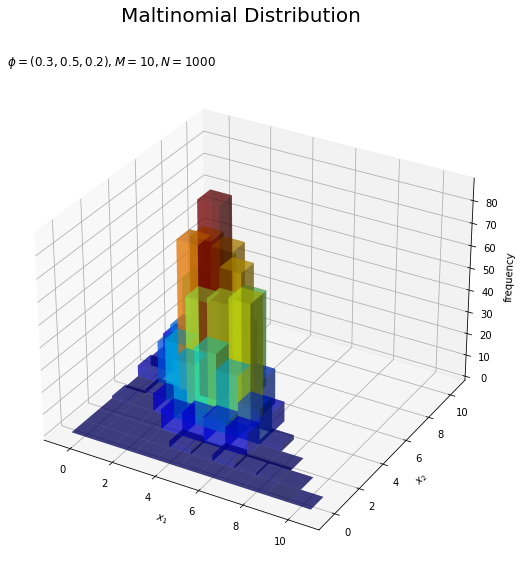

In [30]:
# カラーマップの設定
cm = plt.get_cmap('jet')

# サンプルのヒストグラムを作成
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_vals - 0.45, y=x2_vals - 0.45, z=np.zeros_like(x1_vals), 
         dx=1.0, dy=1.0, dz=frequency, 
         color=cm(frequency / np.max(frequency)), alpha=0.5, shade=True) # ヒストグラム
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('frequency')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + ')' + 
             ', M=' + str(M) + ', N=' + str(N) + '$', loc='left')
#ax.view_init(elev=0, azim=315) # 表示アングル
plt.show()

<br>

　構成比を作図します。

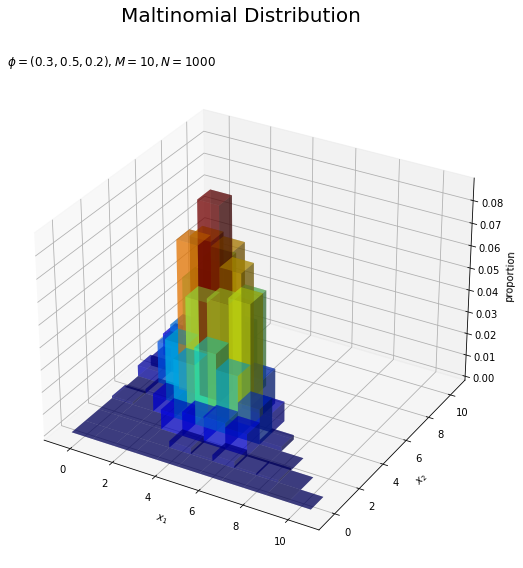

In [31]:
# サンプルの構成比を計算
proportion = frequency / N

# サンプルの構成比を作図
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_vals - 0.45, y=x2_vals - 0.45, z=np.zeros_like(x1_vals), 
         dx=1.0, dy=1.0, dz=proportion, 
         color=cm(proportion / np.max(proportion)), alpha=0.5, shade=True) # 構成比
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('proportion')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + ')' + 
             ', M=' + str(M) + ', N=' + str(N) + '$', loc='left')
#ax.view_init(elev=0, azim=315) # 表示アングル
plt.show()

　頻度`frequency`をデータ数`N`で割り、各値の構成比を計算します。  

　データ数が十分に増えると分布のグラフに形が近づきます。  
<br>

　サンプルサイズとヒストグラムの変化をアニメーションで確認します。乱数を1つずつ取り出して作図します。  

　ヒストグラムのアニメーションを作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


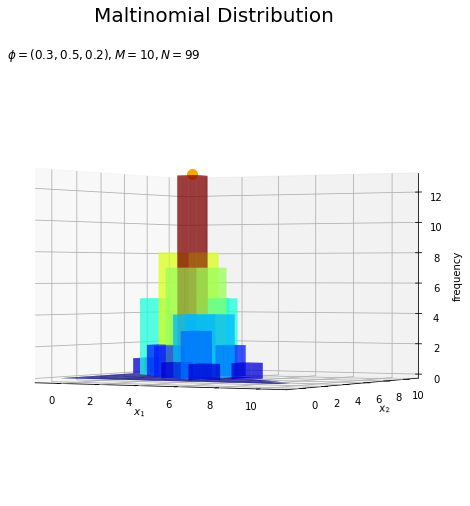

In [32]:
# フレーム数を指定
N_frame = 100

# 図を初期化
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle('Maltinomial Distribution', fontsize=20)

# カラーマップの設定
cm = plt.get_cmap('jet')

# 頻度の最大値を取得
uni_arr, uni_freq = np.unique(x_nv[:N_frame], return_counts=True, axis=0)
z_max = np.max(uni_freq)

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # n個のサンプルをカウント
    uni_arr, uni_freq = np.unique(x_nv[:(n+1)], return_counts=True, axis=0)
    
    # サンプルにないxの点と結合
    frequency = np.zeros(len(x_points))
    for i, x_v in enumerate(uni_arr):
        for j, x_point in enumerate(x_points):
            # 作図用の点とサンプルが一致すれば頻度を代入
            if all(x_point == x_v):
                frequency[j] = uni_freq[i]
                break
    
    # xが取らない値をマスク
    frequency = np.ma.masked_where(x1_vals + x2_vals > M, frequency)
    
    # n番目のサンプルの値を取得
    x1, x2 = x_nv[n, [0, 1]]
    
    # n番目のサンプルの頻度を取得
    x_idx = np.where(np.all(x_points == x_nv[n], axis=1) == True)[0][0]
    z = frequency[x_idx]
    
    # サンプルのヒストグラムを作成
    ax.bar3d(x=x1_vals - 0.5, y=x2_vals - 0.5, z=np.zeros_like(x1_vals), 
             dx=1.0, dy=1.0, dz=frequency, 
             color=cm(frequency / z_max), alpha=0.5, shade=True) # ヒストグラム
    ax.scatter(x1, x2, z + 0.1, color='orange', s=100) # サンプル
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('frequency')
    ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + ')' + 
                 ', M=' + str(M) + ', N=' + str(n) + '$', loc='left')
    ax.set_zlim(0.0, z_max) # z軸の表示範囲
    ax.view_init(elev=0, azim=300) # 表示アングル:(横から)
    #ax.view_init(elev=90, azim=270) # 表示アングル:(上から)

# gif画像を作成
anime_freq = FuncAnimation(fig, update, frames=N_frame, interval=100)

# gif画像を保存
anime_freq.save('../figure/Python/Multinomial_freq.gif')

<br>

　構成比のアニメーションを作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


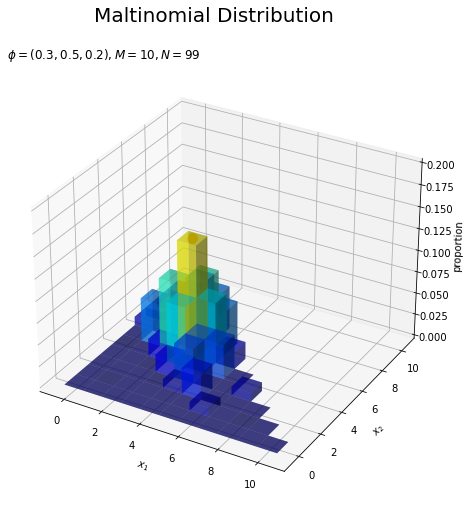

In [33]:
# フレーム数を指定
N_frame = 100

# 図を初期化
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle('Maltinomial Distribution', fontsize=20)

# カラーマップの設定
cm = plt.get_cmap('jet')

# 構成比の最大値を取得
uni_arr, uni_freq = np.unique(x_nv[:N_frame], return_counts=True, axis=0)
p_max = np.max(uni_freq) / N
p_max = 0.2

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # n個のサンプルをカウント
    uni_arr, uni_freq = np.unique(x_nv[:(n+1)], return_counts=True, axis=0)
    
    # サンプルにないxの点と結合
    frequency = np.zeros(len(x_points))
    for i, x_v in enumerate(uni_arr):
        for j, x_point in enumerate(x_points):
            # 作図用の点とサンプルが一致すれば頻度を代入
            if all(x_point == x_v):
                frequency[j] = uni_freq[i]
                break
    
    # サンプルの構成比を計算
    proportion = frequency / (n + 1)
    
    # xが取らない値をマスク
    proportion = np.ma.masked_where(x1_vals + x2_vals > M, proportion)
    
    # n番目のサンプルの値を取得
    x1, x2 = x_nv[n, [0, 1]]
    
    # n番目のサンプルの頻度を取得
    x_idx = np.where(np.all(x_points == x_nv[n], axis=1) == True)[0][0]
    z = proportion[x_idx]
    
    # サンプルの構成比を作成
    ax.bar3d(x=x1_vals - 0.5, y=x2_vals - 0.5, z=np.zeros_like(x1_vals), 
             dx=1.0, dy=1.0, dz=proportion, 
             color=cm(proportion / p_max), alpha=0.5, shade=True) # 構成比
    ax.scatter(x1, x2, z, color='orange', s=100) # サンプル
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('proportion')
    ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + ')' + 
                 ', M=' + str(M) + ', N=' + str(n) + '$', loc='left')
    ax.set_zlim(0.0, p_max) # z軸の表示範囲
    #ax.view_init(elev=0, azim=300) # 表示アングル:(横から)
    #ax.view_init(elev=90, azim=270) # 表示アングル:(上から)

# gif画像を作成
anime_prop = FuncAnimation(fig, update, frames=N_frame, interval=100)

# gif画像を保存
anime_prop.save('../figure/Python/Multinomial_prop.gif')

　サンプルが増えるに従って、元の分布に近付いていくのを確認できます。  

　以上で、多項分布を確認できました。  
<br>